<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/bankrupcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages and dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'https://raw.githubusercontent.com/JaperTai77/data-modified/main/data.csv'
df = pd.read_csv(path)

# Data Preprocessing

## Check dataset

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Replace column names by simplier names

In [6]:
# Create a variable gives information of the columns
names = np.arange(1, 97, 1).tolist()
def colname(df, names = names):
  cols = df.columns
  dictionary = dict()
  for i, name in enumerate(names):
    dictionary[name] = cols[i]
  return dictionary
col_namnes = colname(df)

In [7]:
df.columns = names
df = df.rename(columns = {1:'response'})

In [8]:
col_namnes

{1: 'Bankrupt?',
 2: ' ROA(C) before interest and depreciation before interest',
 3: ' ROA(A) before interest and % after tax',
 4: ' ROA(B) before interest and depreciation after tax',
 5: ' Operating Gross Margin',
 6: ' Realized Sales Gross Margin',
 7: ' Operating Profit Rate',
 8: ' Pre-tax net Interest Rate',
 9: ' After-tax net Interest Rate',
 10: ' Non-industry income and expenditure/revenue',
 11: ' Continuous interest rate (after tax)',
 12: ' Operating Expense Rate',
 13: ' Research and development expense rate',
 14: ' Cash flow rate',
 15: ' Interest-bearing debt interest rate',
 16: ' Tax rate (A)',
 17: ' Net Value Per Share (B)',
 18: ' Net Value Per Share (A)',
 19: ' Net Value Per Share (C)',
 20: ' Persistent EPS in the Last Four Seasons',
 21: ' Cash Flow Per Share',
 22: ' Revenue Per Share (Yuan ¥)',
 23: ' Operating Profit Per Share (Yuan ¥)',
 24: ' Per Share Net profit before tax (Yuan ¥)',
 25: ' Realized Sales Gross Profit Growth Rate',
 26: ' Operating Prof

# Exploratory Data Analysis

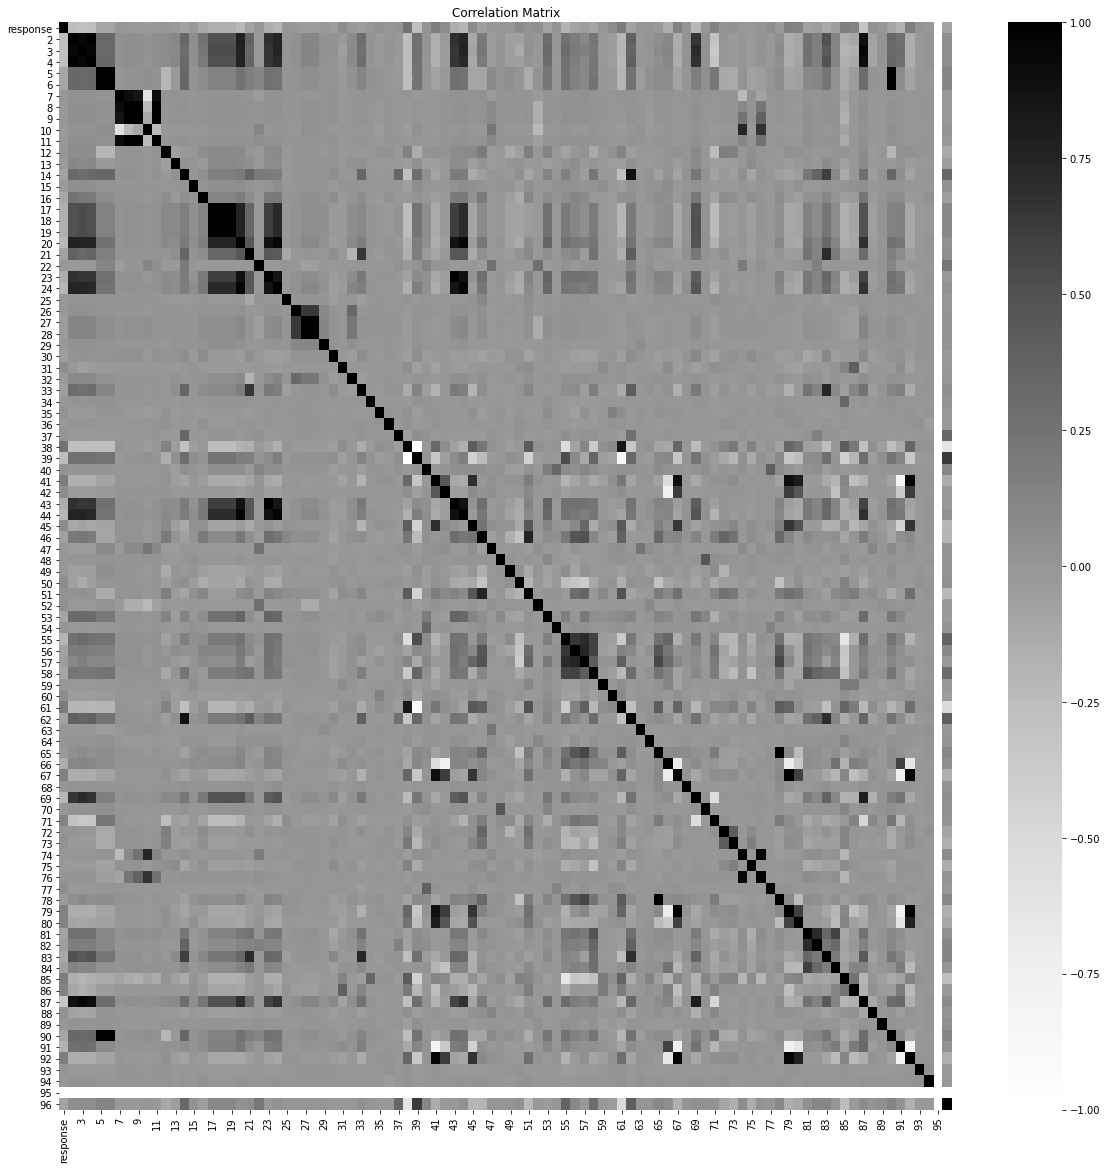

In [9]:
def df_corr(df = df, save = False):
  plt.figure(figsize = (20,20))
  sns.heatmap(df.corr(), cmap = 'Greys').set_title('Correlation Matrix')
  if save == True:
    plt.savefig(corr.png)
df_corr(df)

Text(0.5, 1.0, 'Correlation (Response)')

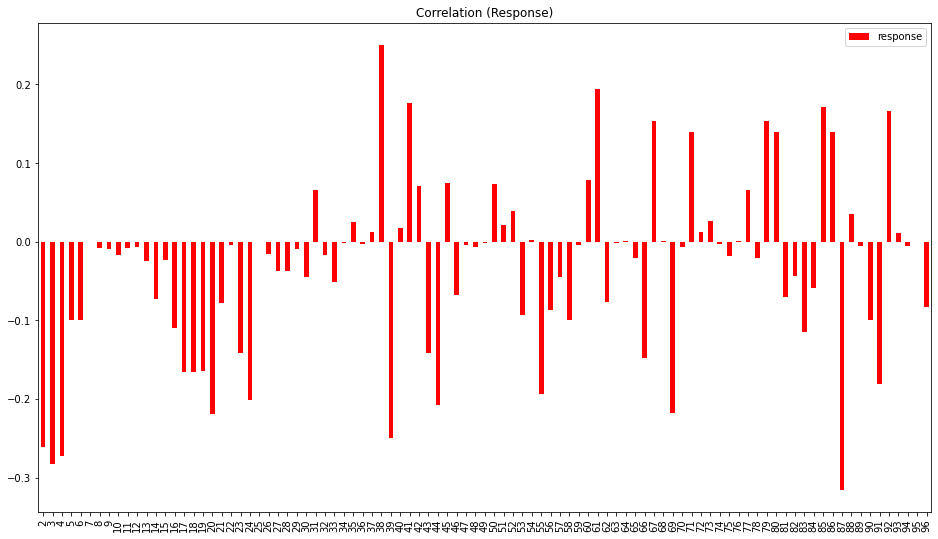

In [10]:
pd.DataFrame(df.corr()['response'].drop('response')).plot(kind = 'bar',color = 'red',figsize = (16,9)).set_title('Correlation (Response)')

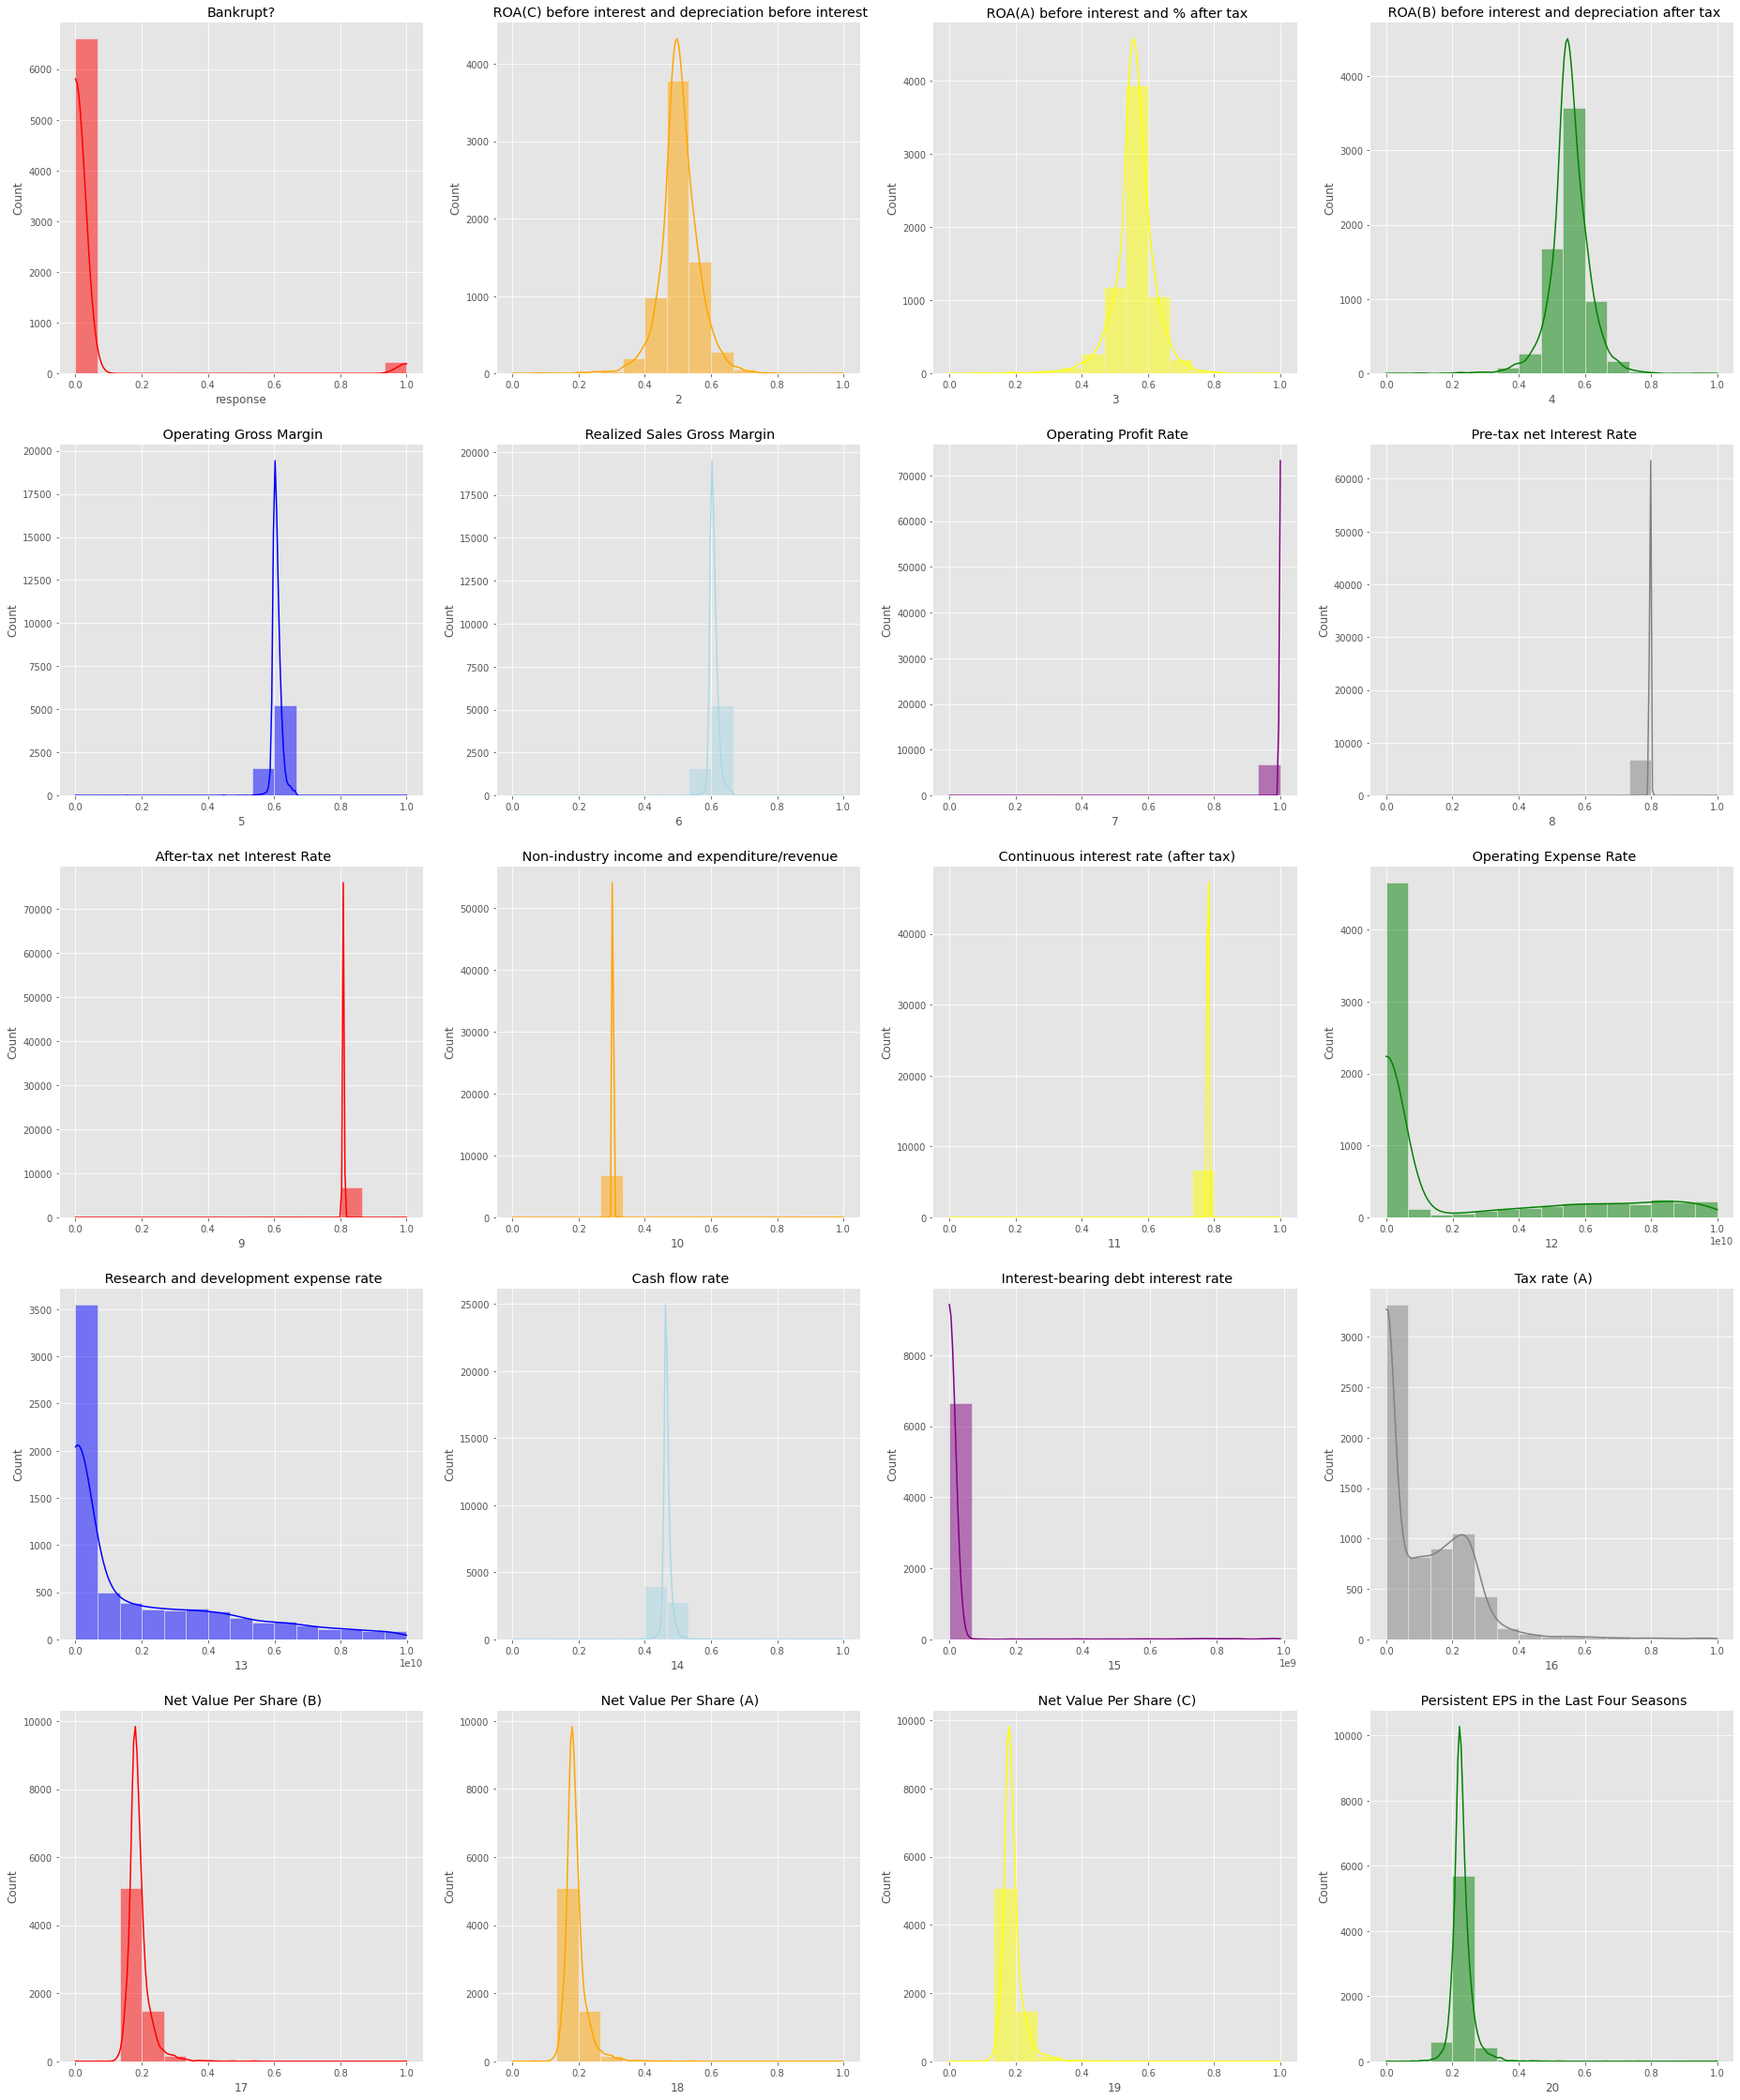

In [20]:
def pplot(df,a,b,col_namnes = col_namnes,c = 0):
    color = ['red','orange','yellow','green','blue','lightblue','purple','gray','red','orange','yellow','green','blue','lightblue','purple','gray','red','orange','yellow','green','blue','lightblue','purple','gray']
    int_col = df.select_dtypes(['int','float']).columns
    l = range(len(df.columns))
    col = df.columns
    i = 0
    plt.style.use('ggplot')
    plt.figure(figsize = (b*8,a*8))
    for i in l:
        if col[i] in int_col:
            plt.subplot(a,b,i+1)
            sns.histplot(df[col[i]],kde = True, legend = True, color = color[i],bins = 15).set_title(col_namnes[i+c+1])
            i = i+1
        else:
            plt.subplot(a,b,i+1)
            sns.countplot(df[col[i]],color = color[i]).set_title(col[i])
            i = i+1
    plt.show()  
pplot(df.iloc[:,0:20],5,4)

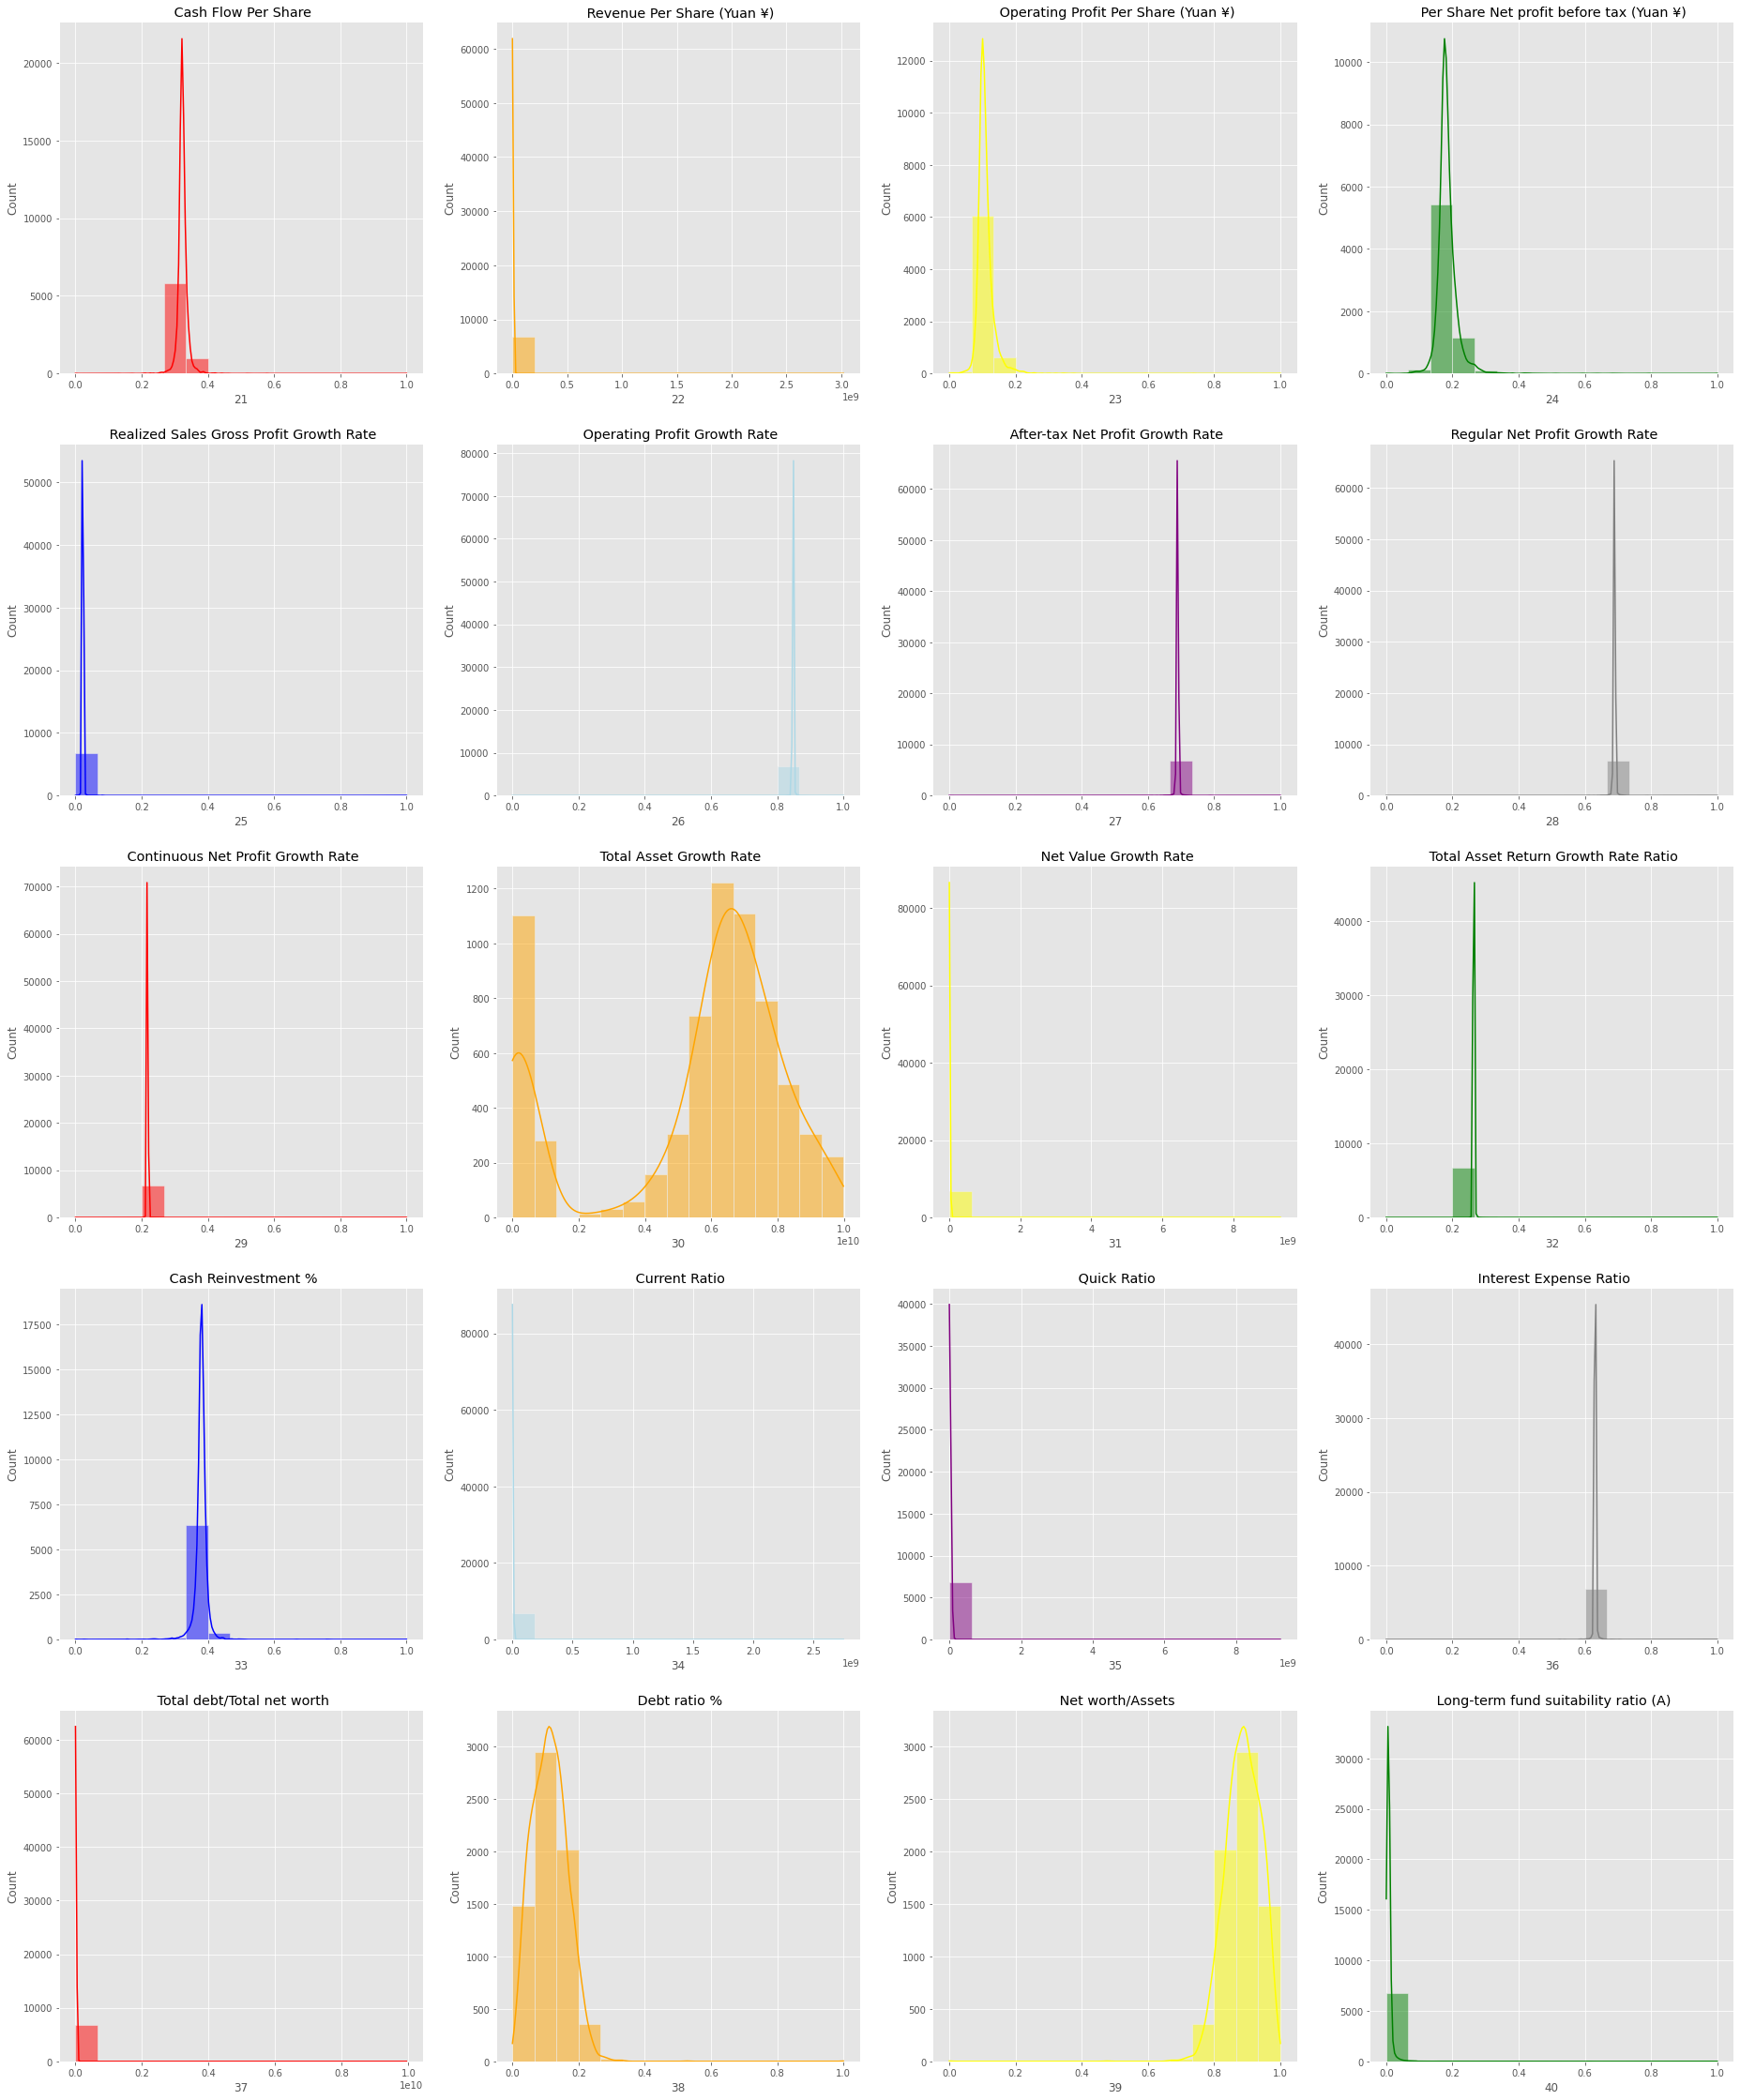

In [47]:
pplot(df.iloc[:,20:40],5,4,c = 20)

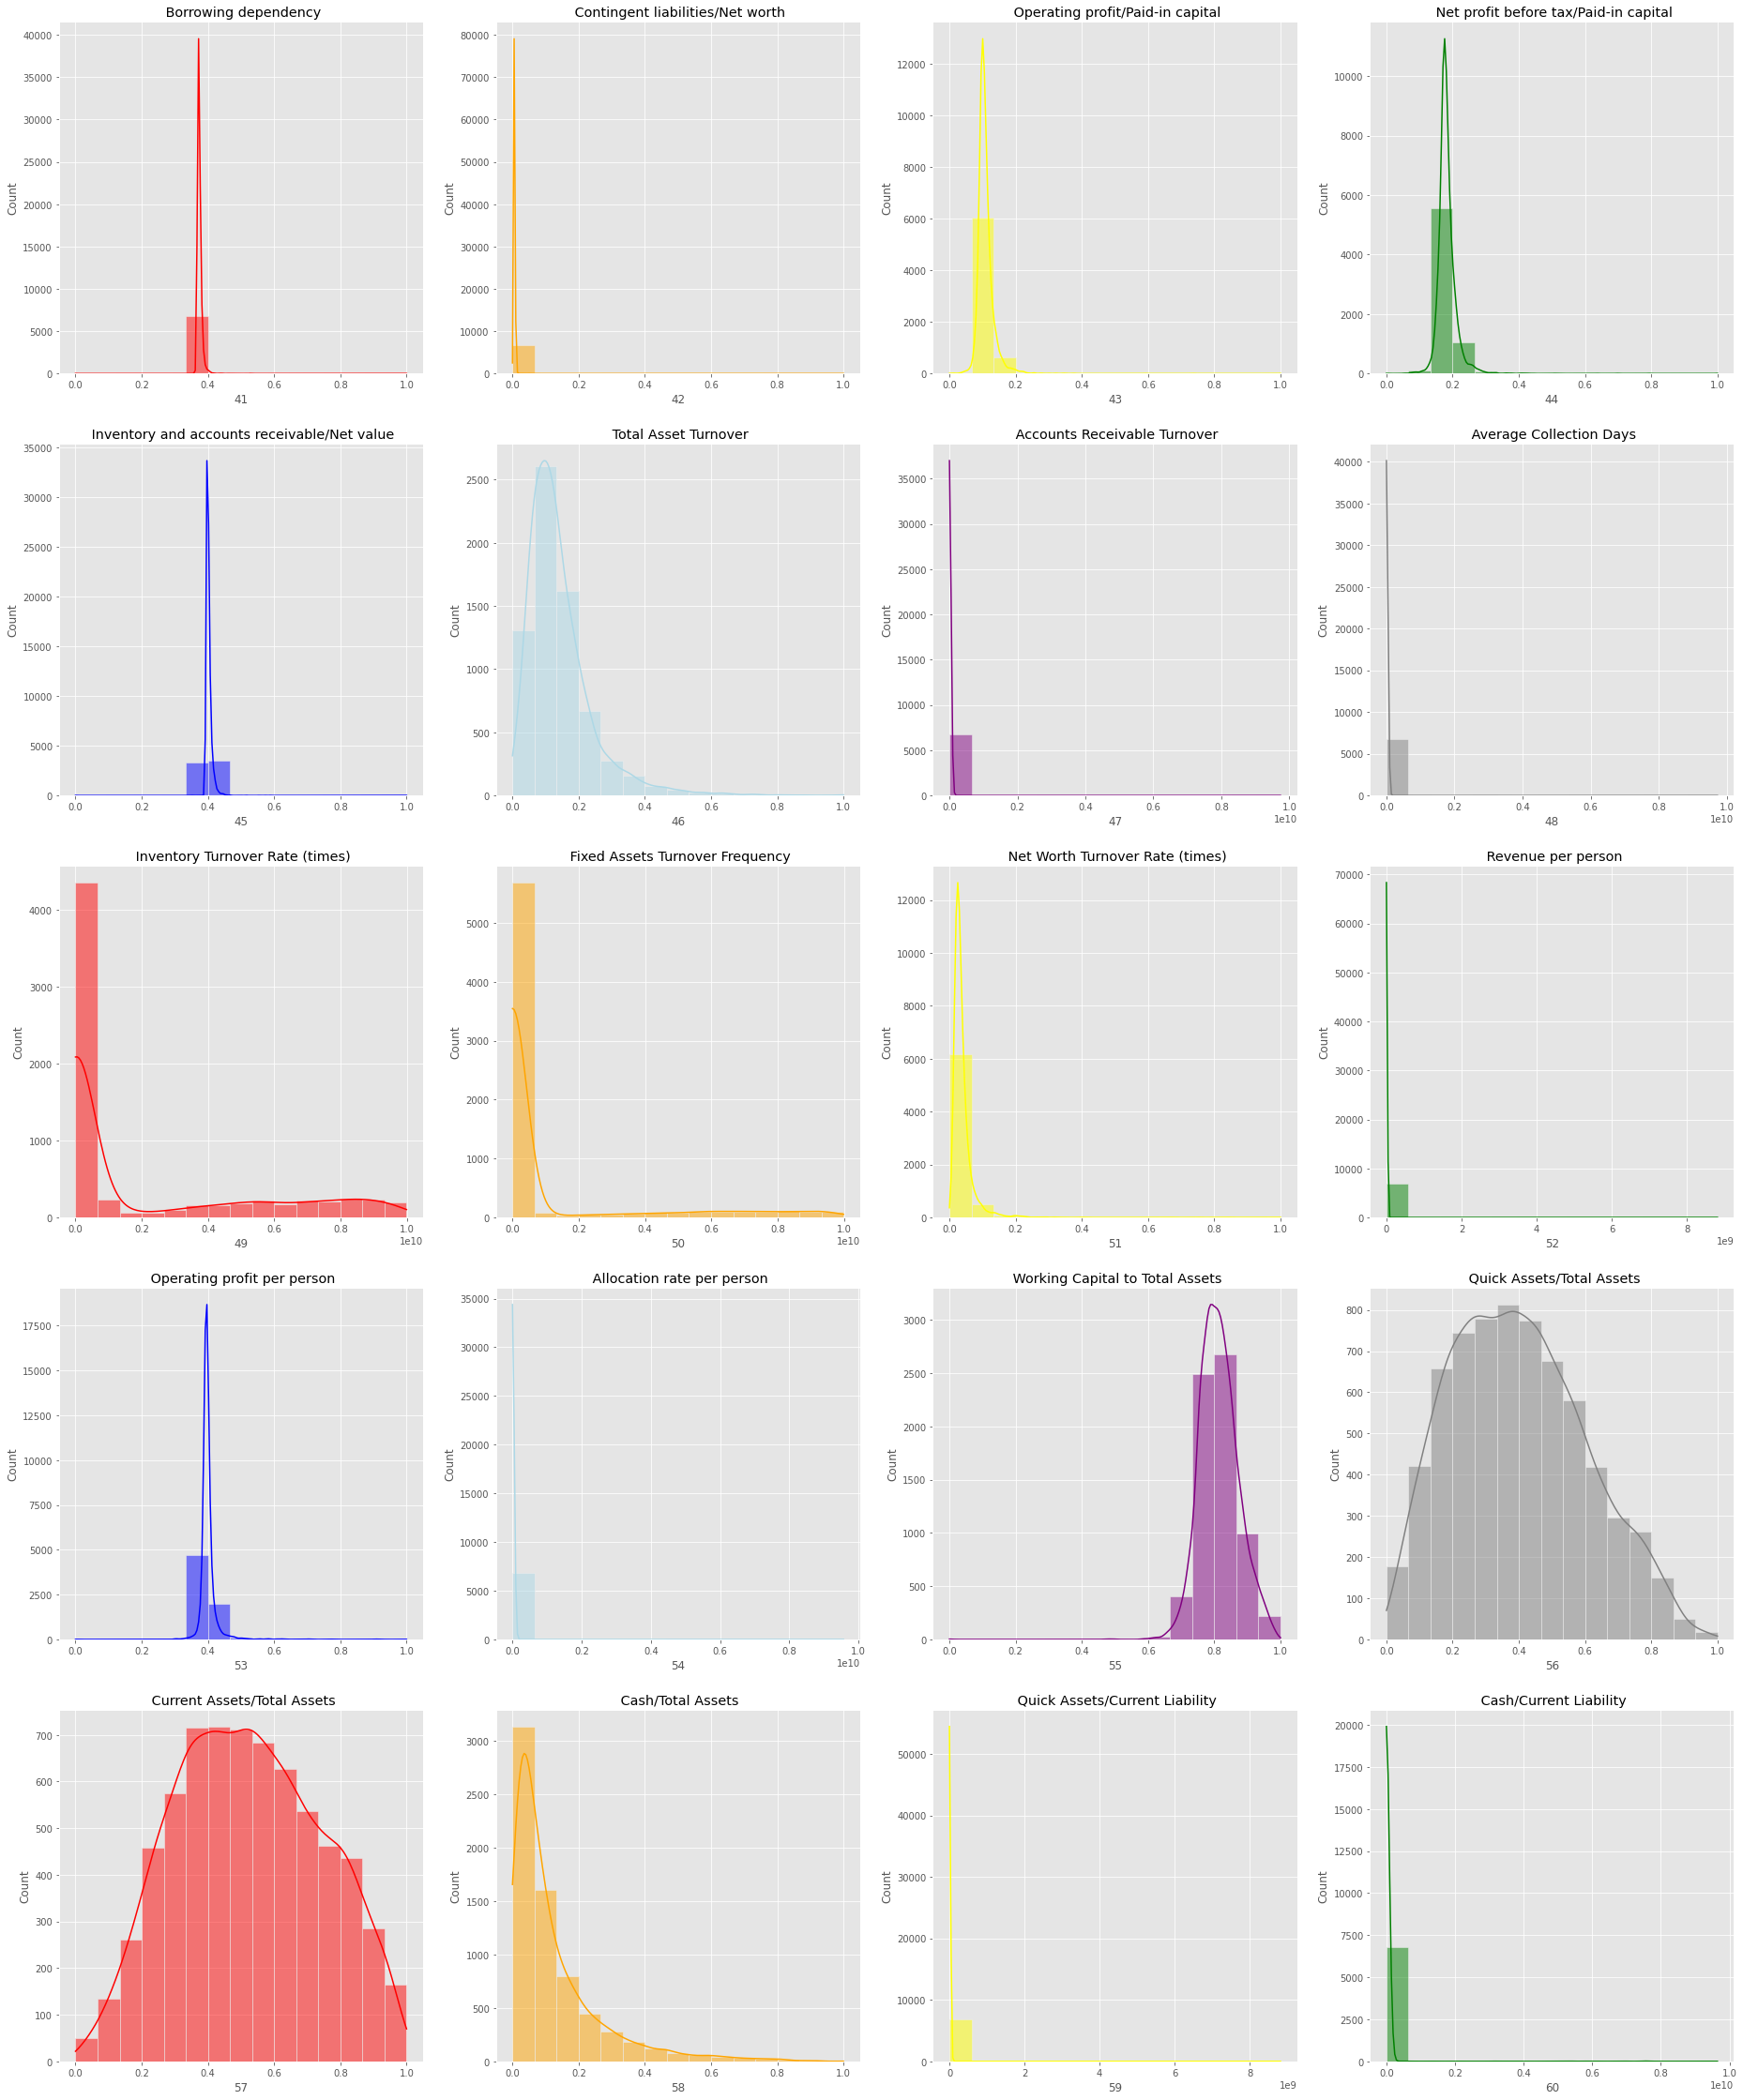

In [22]:
pplot(df.iloc[:,40:60],5,4,c = 40)

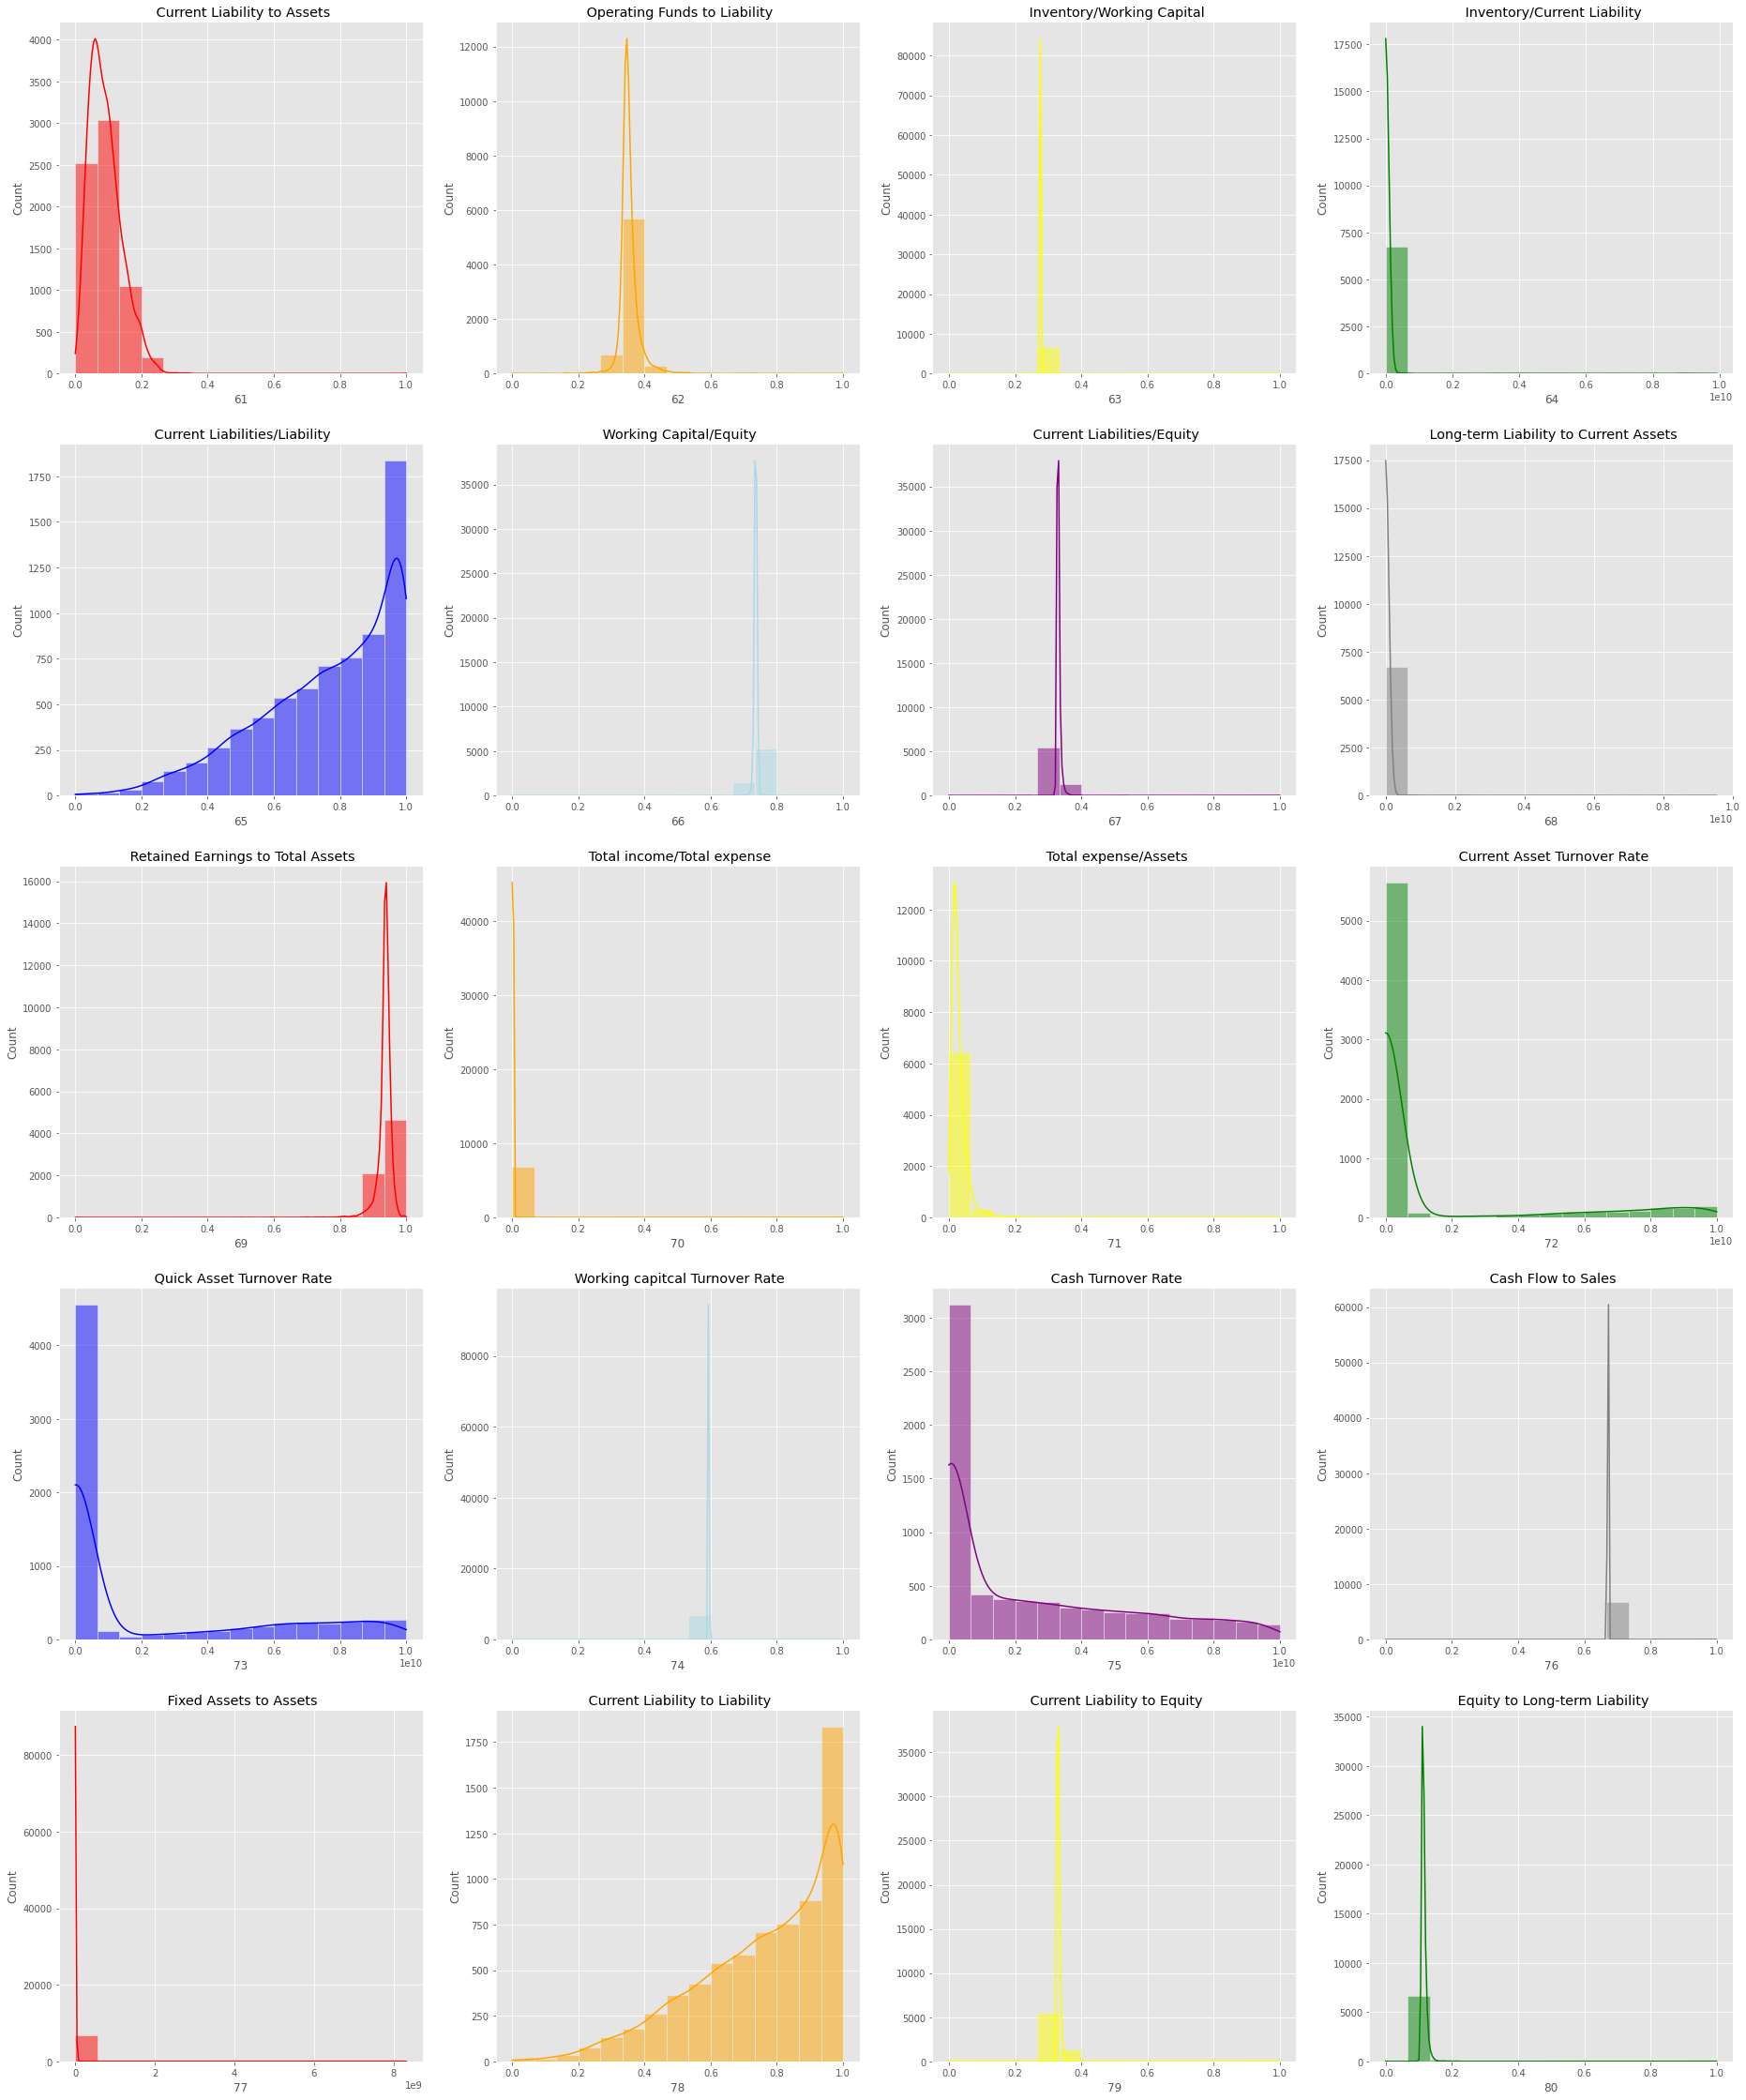

In [23]:
pplot(df.iloc[:,60:80],5,4,c = 60)

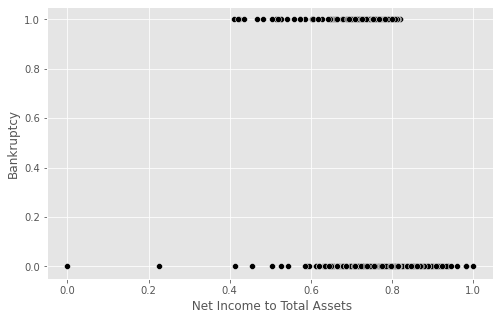

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(y = 'response',x = 87,data = df, color = 'black')
plt.xlabel(col_namnes[87])
plt.ylabel('Bankruptcy')
plt.show()

In [44]:
# bankrupcy against whether spent on resarch expenditure
print(col_namnes[13])
df['expense0_1'] = pd.cut(df[13],3,labels = ['low', 'medium','high'])
expense = df.groupby(['expense0_1','response']).agg({'response':['count']}).reset_index()
expense.columns = ['expense','Bankrupcy','y']

 Research and development expense rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


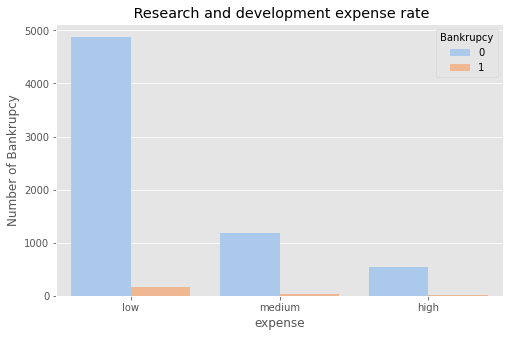

In [45]:
plt.figure(figsize = (8,5))
sns.barplot('expense','y',hue = 'Bankrupcy', data = expense,palette='pastel')
plt.ylabel('Number of Bankrupcy')
plt.title(col_namnes[13])
plt.show()

# Scale and Dimension Reduciton

### Train test split

In [48]:
X = df.drop(columns = ['response','expense0_1'])
Y = df['response']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)

### Scale data 

In [139]:
def scale(X_train,X_test):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_trainS = sc.fit_transform(X_train)
  X_testS = sc.transform(X_test)
  return (X_trainS,X_testS,sc)
X_trainS,X_testS,sc = scale(X_train,X_test)

### PCA

In [56]:
def PCA(X_train,X_test):
  from sklearn.decomposition import PCA
  pca = PCA(n_components = 20)
  X_trainPCA = pca.fit_transform(X_train)
  X_testPCA = pca.transform(X_test)
  return (X_trainPCA, X_testPCA, pca)
X_trainSPCA, X_testSPCA, pca = PCA(X_trainS,X_testS)

### Autoencoder

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [55]:
encoder = Sequential()
encoder.add(Dense(units = 20, activation = 'relu', input_shape = [95]))
decoder = Sequential()
decoder.add(Dense(units = 95, activation = 'relu', input_shape = [20]))
autoen = Sequential([encoder,decoder])
from tensorflow.keras.optimizers import SGD
autoen.compile(loss="mse")
autoen.fit(x = X_trainS, y = X_trainS, epochs=20)

Epoch 1/20
160/160 [==============================] - 1s 1ms/step - loss: 1.0327
Epoch 2/20
160/160 [==============================] - 0s 1ms/step - loss: 0.7558
Epoch 3/20
160/160 [==============================] - 0s 1ms/step - loss: 0.8085
Epoch 4/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6939
Epoch 5/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6998
Epoch 6/20
160/160 [==============================] - 0s 1ms/step - loss: 0.7250
Epoch 7/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6496
Epoch 8/20
160/160 [==============================] - 0s 1ms/step - loss: 0.8023
Epoch 9/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6637
Epoch 10/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6821
Epoch 11/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6465
Epoch 12/20
160/160 [==============================] - 0s 1ms/step - loss: 0.7441
Epoch 13/20
160/160 [====

In [57]:
X_trainSencode = encoder.predict(X_trainS)
X_testSencode = encoder.predict(X_testS)

# Machine Learning

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def result_table(Y_test,y_pred):
  cm = confusion_matrix(Y_test, y_pred)
  print(cm)
  print(classification_report(Y_test, y_pred))

## Logistic Regression

In [119]:
def logistic(X_train, X_test, Y_train, Y_test):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
# PCA
y_pred = logistic(X_trainSPCA, X_testSPCA, Y_train, Y_test).ravel()
result_table(Y_test, y_pred)

[[1634    9]
 [  57    5]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1643
           1       0.36      0.08      0.13        62

    accuracy                           0.96      1705
   macro avg       0.66      0.54      0.56      1705
weighted avg       0.94      0.96      0.95      1705



In [120]:
# Autoencoder
y_pred = logistic(X_trainSencode, X_testSencode, Y_train, Y_test).ravel()
result_table(Y_test, y_pred)

[[1637    6]
 [  54    8]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1643
           1       0.57      0.13      0.21        62

    accuracy                           0.96      1705
   macro avg       0.77      0.56      0.60      1705
weighted avg       0.95      0.96      0.95      1705



In [121]:
# Original
y_pred = logistic(X_trainS, X_testS, Y_train, Y_test).ravel()
result_table(Y_test, y_pred)

[[1635    8]
 [  52   10]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1643
           1       0.56      0.16      0.25        62

    accuracy                           0.96      1705
   macro avg       0.76      0.58      0.62      1705
weighted avg       0.95      0.96      0.96      1705



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## SVM

In [122]:
def svm(X_train, X_test, Y_train, Y_test):
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear')
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

# PCA
y_pred = svm(X_trainSPCA,X_testSPCA,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[1643    0]
 [  62    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1643
           1       0.00      0.00      0.00        62

    accuracy                           0.96      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.93      0.96      0.95      1705



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
# Original
y_pred = svm(X_trainS,X_testS,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[1640    3]
 [  58    4]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1643
           1       0.57      0.06      0.12        62

    accuracy                           0.96      1705
   macro avg       0.77      0.53      0.55      1705
weighted avg       0.95      0.96      0.95      1705



## Decision tree

In [124]:
def tree(X_train, X_test, Y_train, Y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy')
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

# PCA
y_pred = tree(X_trainSPCA,X_testSPCA,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[1611   32]
 [  48   14]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1643
           1       0.30      0.23      0.26        62

    accuracy                           0.95      1705
   macro avg       0.64      0.60      0.62      1705
weighted avg       0.95      0.95      0.95      1705



In [125]:
def tree(X_train, X_test, Y_train, Y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy',max_leaf_nodes = 20)
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

# PCA
y_pred = tree(X_trainSPCA,X_testSPCA,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[1637    6]
 [  57    5]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1643
           1       0.45      0.08      0.14        62

    accuracy                           0.96      1705
   macro avg       0.71      0.54      0.56      1705
weighted avg       0.95      0.96      0.95      1705



## Random Forest

In [134]:
def forest(X_train, X_test, Y_train, Y_test):
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 200,criterion = 'entropy')
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = forest(X_trainSPCA,X_testSPCA,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[1642    1]
 [  57    5]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1643
           1       0.83      0.08      0.15        62

    accuracy                           0.97      1705
   macro avg       0.90      0.54      0.56      1705
weighted avg       0.96      0.97      0.95      1705



## Neural Network

In [113]:
model = Sequential()
model.add(Dense(20,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

earstop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 20)
model.fit(x = X_trainSencode, y = Y_train, epochs = 100, validation_data=(X_testSencode,Y_test), callbacks = [earstop])

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 1.3898 - val_loss: 0.3445
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4839 - val_loss: 0.2578
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3798 - val_loss: 0.2105
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3210 - val_loss: 0.1734
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2830 - val_loss: 0.1508
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2679 - val_loss: 0.1376
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2382 - val_loss: 0.1399
Epoch 8/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2159 - val_loss: 0.1351
Epoch 9/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2062 - val_loss: 0.1336
Epoch 10/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2149 - val_lo

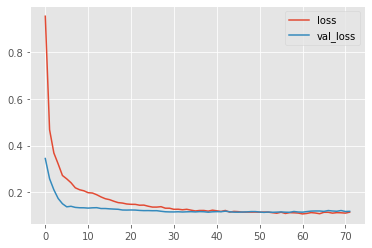

In [114]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [127]:
y_pred = model.predict_classes(X_testSencode)
result_table(Y_test, y_pred)

[[1643    0]
 [  62    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1643
           1       0.00      0.00      0.00        62

    accuracy                           0.96      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.93      0.96      0.95      1705



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion 

Decision Tree and Random Forest classification give us a good result. 

In [130]:
# Decision Tree Classifier (PCA)
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion = 'entropy',max_leaf_nodes = 20)
tree_classifier.fit(X_trainSPCA, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [141]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
for_classifier = RandomForestClassifier(n_estimators = 200,criterion = 'entropy')
for_classifier.fit(X_trainSPCA, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
def Prediction(i = 100,sc = sc, pca = pca):
  x = sc.transform(pd.DataFrame(X_train.iloc[i]).T)
  x = pca.transform(x)
  print('Random forest prediction:',for_classifier.predict(x),'True:',Y_train.iloc[i])
  print('Decision tree prediction:',tree_classifier.predict(x),'True:',Y_train.iloc[i])

In [143]:
Prediction()

Random forest prediction: [0] True: 0
Decision tree prediction: [0] True: 0


In [147]:
Prediction(i = 23)

Random forest prediction: [0] True: 0
Decision tree prediction: [0] True: 0


In [149]:
Prediction(i = 5021)

Random forest prediction: [0] True: 0
Decision tree prediction: [0] True: 0
